# **Life Expectancy and GDP**

# **Introduction**

The "**life_expectancy_gdp.ipynb**" notebook contains all the information and code for the project.

<br>

The objective of this project was to analyze the **Gross Domestic Product (GDP)** and **Life Expectancy at Birth** across various countries, examining the relationship between a country's economic output and the average life expectancy of its population.

<br>

The dataset was curated by the **World Health Organization (WHO)** and the **World Bank Group (WBG)**. 

<br>

**Gross Domestic Product (GDP)** is a widely used economic indicator that measures the **total value of all goods and services produced within a country's borders over a specific time period**. 
<br>It serves as a key measure of a nation's economic activity and is commonly used to assess the overall health and growth of an economy.

<br>GDP takes into account the combined value of consumer spending, government expenditures, business investments, and net exports (exports minus imports). It provides insights into the size and performance of different sectors, such as agriculture, manufacturing, services, and construction, contributing to the overall economic output.
<br>It is typically measured in a country's national currency, such as dollars or euros, and is reported on a quarterly or annual basis. 
<br>**It enables policymakers, economists, and investors to monitor and analyze economic trends, make informed decisions, and compare the relative economic performance among different countries or regions**.

<br>

While GDP is a widely recognized metric, it has certain limitations. 
<br>It does not capture non-market activities, such as household production or volunteer work, and **may not fully reflect the well-being or distribution of wealth within a society**. 
<br>Therefore, it is often used in conjunction with other indicators, such as the **Life Expectancy at Birth (LEABY)**, to provide a more comprehensive assessment of a nation's overall development and standard of living.

# **Modules**

In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from scipy.stats import pearsonr

# **Dissecting the file**

## **Unpacking the "all_data.csv" file**

In [133]:
# store the file into a pandas dataframe
df = pd.read_csv("all_data.csv")

# pandas personal preference options
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None) 
pd.set_option('display.max_colwidth', None)
#pd.set_option('display.float_format', lambda x: '%.5f' % x)

## **Inspecting and cleaning the data**

In [134]:
# a quick glance of the dataset
print(df.head())

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10


In [135]:
# check for abnormalities (mean/min/max), n of countries, range of years and life expectancy...
df.describe(include="all")

,Country,Year,Life expectancy at birth (years),GDP
count,96,96.000000,96.000000,9.600000e+01
unique,6,NaN,NaN,NaN
top,Chile,NaN,NaN,NaN
freq,16,NaN,NaN,NaN
mean,NaN,2007.500000,72.789583,3.880499e+12
std,NaN,4.633971,10.672882,5.197561e+12
min,NaN,2000.000000,44.300000,4.415703e+09
25%,NaN,2003.750000,74.475000,1.733018e+11
50%,NaN,2007.500000,76.750000,1.280220e+12
75%,NaN,2011.250000,78.900000,4.067510e+12


In [136]:
# which countries are in the dataset
print(df.Country.unique())

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


In [137]:
# chronological scope
print(df.Year.unique())

[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


In [138]:
# to facilitate data manipulation, columns are renamed by eliminating capitalization and substituting lengthy column names with acronyms
df.rename(columns={"Country": "country", "Year": "year", "Life expectancy at birth (years)": "leaby", "GDP": "gdp"}, inplace=True)

In [139]:
# renaming "United States of America" to "USA" for easier plotting/manipulating later on
df['country'] = df['country'].replace('United States of America', 'USA')

In [140]:
# converting the GDP for easier interpretation
df['gdp'] = df['gdp'] / 1e12

In [141]:
# check the column renaming, structure of the dataframe and if there are any null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  96 non-null     object 
 1   year     96 non-null     int64  
 2   leaby    96 non-null     float64
 3   gdp      96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


In [142]:
# is the chronological scope the same for each country in the dataset
country_by_year = df.groupby("country").apply(lambda x: x["year"].unique())

display(pd.DataFrame(country_by_year))

,0
country,
Chile,"[2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]"
China,"[2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]"
Germany,"[2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]"
Mexico,"[2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]"
USA,"[2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]"
Zimbabwe,"[2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]"



<br>

The file is made of **four columns** which contain: 

- **Country** 

> Countries included in this dataset are: **Chile, China, Germany, Mexico, United States of America and Zimbabwe**.

- **Year**

> The dataset covers the chronological scope from **2000** to **2015**, represented by **integers**.

- **Life expectancy at birth (years)**

> The average life expectancy at birth is represented by a numerical value in **floating-point** format, representing **years**.

- **GDP**

> The **Gross Domestic Product (GDP)** is denoted as a numerical value expressed in **floating-point** format using **U.S. dollars**.

<br>

There are **96 rows** of data. 

Each country possesses a **distinct average life expectancy at birth, along with its corresponding GDP, for each year spanning from 2000 to 2015**.

**There are no instances of missing data or concerns regarding data quality**.

<br>


# **Questions and Analysis**

### **Has Life Expectancy increased over time in the six nations?**

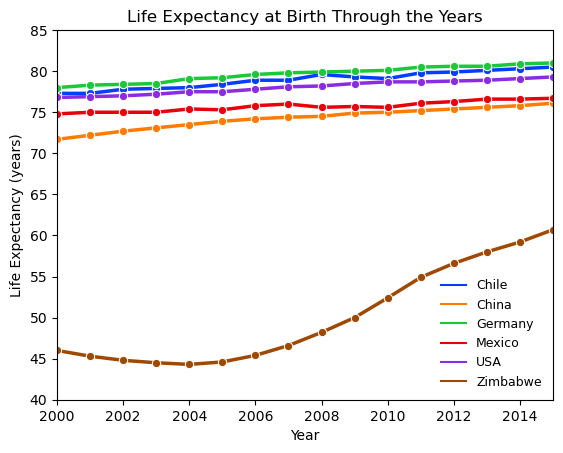

In [143]:
sns.set_palette("bright")

# Life Expectancy at Birth Through the Years Line Plot
sns.lineplot(x="year", y="leaby", data=df, hue="country", marker="o", linewidth=2.5)
plt.title("Life Expectancy at Birth Through the Years")
plt.xlabel("Year")
plt.ylabel("Life Expectancy (years)")
plt.ylim(40, 85)
plt.xlim(2000, 2015)

plt.legend(fontsize="9", frameon=False)
plt.show()

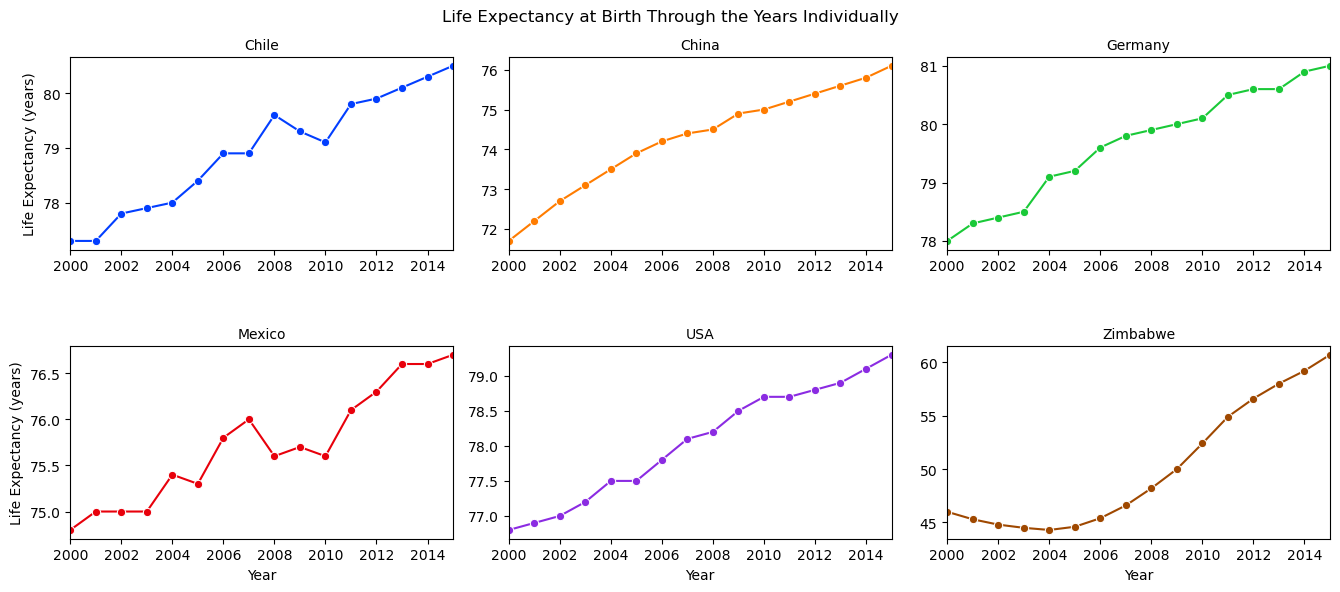

In [144]:
# Life Expectancy at Birth Through the Years Individually
leaby_single = sns.FacetGrid(df, col="country", col_wrap=3, hue="country", sharey=False, sharex=False, despine=False, xlim=(2000, 2015), aspect=1.5)
leaby_single = (leaby_single.map(sns.lineplot, "year", "leaby", marker='o').set_axis_labels("Year", "Life Expectancy (years)"))

leaby_single.set_titles(col_template="{col_name}")
leaby_single.fig.suptitle("Life Expectancy at Birth Through the Years Individually")
plt.subplots_adjust(top=0.9, hspace=0.5)

plt.show()

<br>

These results indicate that, in general, **the average life expectancy at birth has been increasing steadily for all countries in the dataset from 2000 to 2015**. 
<br>This suggests an overall improvement in the health and well-being of populations across the world during that period.

<br>

However, while observing the individual plots, **Zimbabwe stands out** as an exception in this trend. Unlike other countries, Zimbabwe experienced a significant increase in its average life expectancy at birth. 
<br>This exceptional improvement could be attributed to various factors such as advancements in healthcare, public health initiatives, socioeconomic developments, or specific interventions targeting health issues in the country.

<br>**Despite experiencing a decline in life expectancy between 2007 and 2011**, both **Chile** and **Mexico** have exhibited an **overall positive trajectory** in this key demographic indicator during the specified timeframe.

<br>

It is important to note that without specific data on the exact numbers and rates of change, it is challenging to provide a more detailed interpretation. 
<br>Additionally, **it would be beneficial to analyze more recent data to assess if these trends have continued beyond 2015 and to understand the specific factors contributing to the observed changes in Life Expectancy**.

<br>


### **Has GDP increased over time in the six nations?**

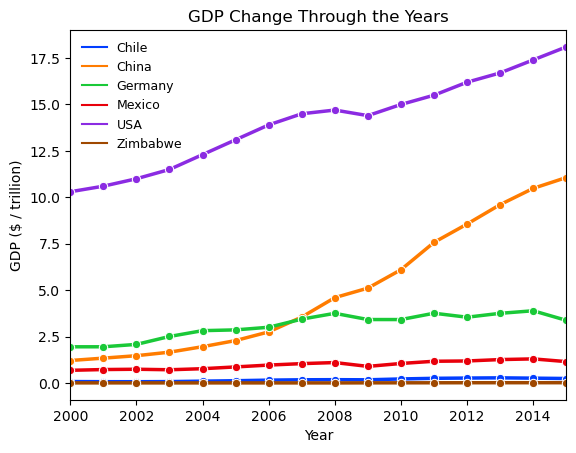

In [145]:
sns.set_palette("bright")

# GDP Through the Years 
sns.lineplot(x="year", y="gdp", data=df, hue="country", marker="o", linewidth=2.5)
plt.title("GDP Change Through the Years")
plt.xlabel("Year")
plt.ylabel("GDP ($ / trillion)")
plt.xlim(2000, 2015)

plt.legend(fontsize="9", loc="upper left", frameon=False)
plt.show()

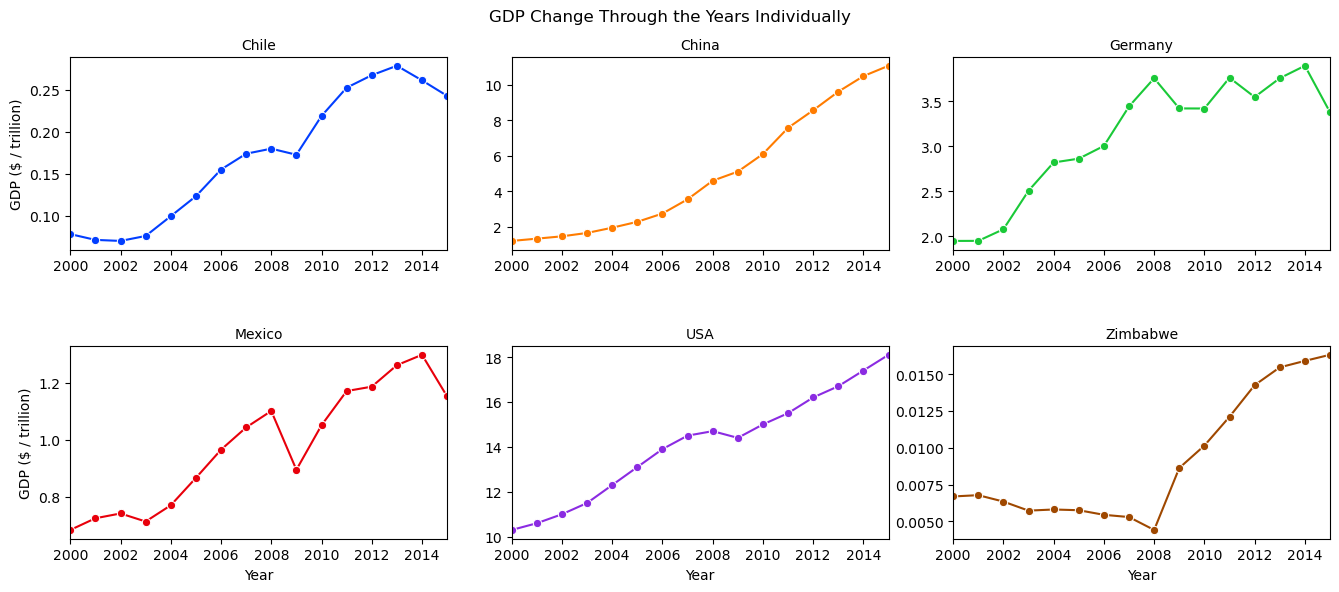

In [146]:
# GDP Through the Years Individually
gpd_single = sns.FacetGrid(df, col="country", col_wrap=3, hue="country", sharey=False, sharex=False, despine=False, xlim=(2000, 2015), aspect=1.5)
gpd_single = (gpd_single.map(sns.lineplot, "year", "gdp", marker='o').set_axis_labels("Year", "GDP ($ / trillion)"))

gpd_single.set_titles(col_template="{col_name}")
gpd_single.fig.suptitle("GDP Change Through the Years Individually")
plt.subplots_adjust(top=0.9, hspace=0.5)
plt.show()


<br>

The results indicate that between the years 2000 and 2015, the GDP of both the **United States and China experienced a substantial increase**. This growth might be attributed to various factors such as industrial development, technological advancements, increased trade activities, and investment opportunities.
<br>The **comparison to other nations in the dataset** indicates that **the growth of the United States and China's economies outpaced that of other countries during this period**. This suggests that these two nations were able to achieve higher rates of economic growth or had stronger economic performances compared to other nations.
<br>Although **Zimbabwe's** total GDP has not experienced a significant increase compared to countries like the USA and China, it is noteworthy that a **notable positive growth trajectory** has been observed since 2008.

<br>

**Chile**, **Germany**, and **Mexico** demonstrate a **notable decline** in their respective GDPs between the years **2013 and 2015** (and earlier for Mexico). 

Here are **some potential reasons for the decline in GDP during that period for each country**:

**Chile**:
<br>

> **1. Decline in copper prices**: Chile is a major exporter of copper, and a drop in global copper prices could have adversely affected the country's economy.

> **2. Slowdown in global demand**: Reduced global demand for Chilean exports, including copper and other commodities, could have impacted the country's GDP growth.

> **3. Economic policies**: Changes in government policies or regulations that hindered investment or business activity might have contributed to the drop in GDP.

<br>

**Germany**:
<br>

> **1. Eurozone crisis**: The Eurozone crisis, which began in 2009, affected several European countries, including Germany. The crisis led to decreased demand for German exports and financial instability, impacting Germany's economic growth.

> **2. Global economic slowdown**: A general slowdown in the global economy during that period, with reduced demand for German goods and services, could have had an adverse impact on GDP.

> **3. Structural changes**: The German economy underwent structural changes during that period, including shifts in manufacturing and industry. These changes might have caused short-term disruptions in GDP growth.

<br>

**Mexico**:
<br>

> **1. US economic conditions**: Mexico has strong economic ties with the United States, and any downturn or slowdown in the US economy could have affected Mexico's GDP growth.

> **2. Decline in oil prices**: Mexico is a significant oil producer, and the drop in global oil prices during that period could have negatively impacted the country's GDP, as oil revenues are a crucial component of its economy.

> **3. Security issues**: Mexico faced significant challenges related to drug-related violence and security issues during that period, which could have affected investment and economic activity, leading to a decline in GDP.

<br>


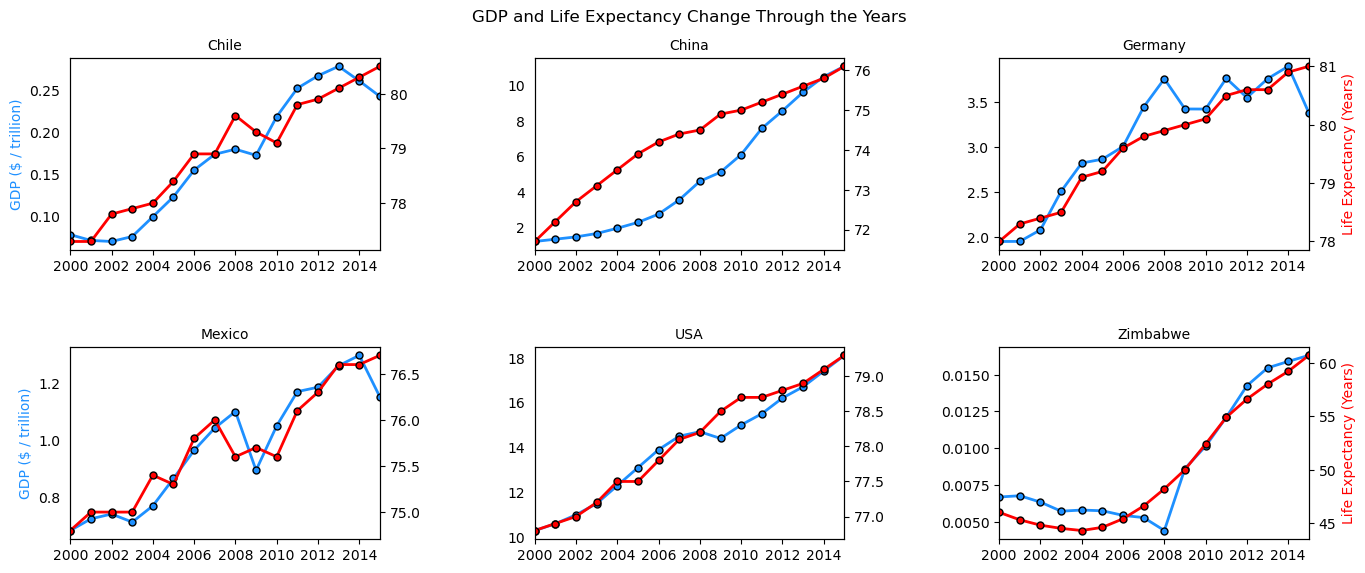

In [147]:
gpd_leaby = sns.FacetGrid(df, col="country", col_wrap=3, sharey=False, sharex=False, despine=False, xlim=(2000, 2015), aspect=1.5)

def plot_gdp(data, **kwargs):
    ax = plt.gca()
    data.plot(kind="line", x="year", y="gdp", marker="o", ax=ax, linewidth=2, markersize=5, markeredgecolor="black", **kwargs)

def plot_leaby(data, **kwargs):
    ax = plt.gca()
    data.plot(kind="line", x="year", y="leaby", marker="o", ax=ax, secondary_y=True, linewidth=2, markersize=5, markeredgecolor="black",  **kwargs)

gpd_leaby.map_dataframe(plot_gdp, color="dodgerblue")
gpd_leaby.map_dataframe(plot_leaby, color="red")

gpd_leaby.set_titles(col_template="{col_name}")
gpd_leaby.set_axis_labels("", "GDP ($ / trillion)", color="dodgerblue")

axes = gpd_leaby.axes.flatten()

for i, ax in enumerate(axes):
    if i in [0, 3]:
        ax.set_ylabel("GDP ($ / trillion)", color="dodgerblue")
    else:
        ax.set_ylabel("")

for i, ax in enumerate(axes):
    if i in [2, 5]:
        ax.right_ax.set_ylabel("Life Expectancy (Years)", color="red")
    else:
        ax.right_ax.set_ylabel("")
        ax.yaxis.set_ticks_position("none")

for ax in axes:
    ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

gpd_leaby.fig.suptitle("GDP and Life Expectancy Change Through the Years")
plt.subplots_adjust(top=0.9, hspace=0.5, wspace=0.5)
plt.show()

### **How do the Life Expectancy and GDP vary among different countries?**

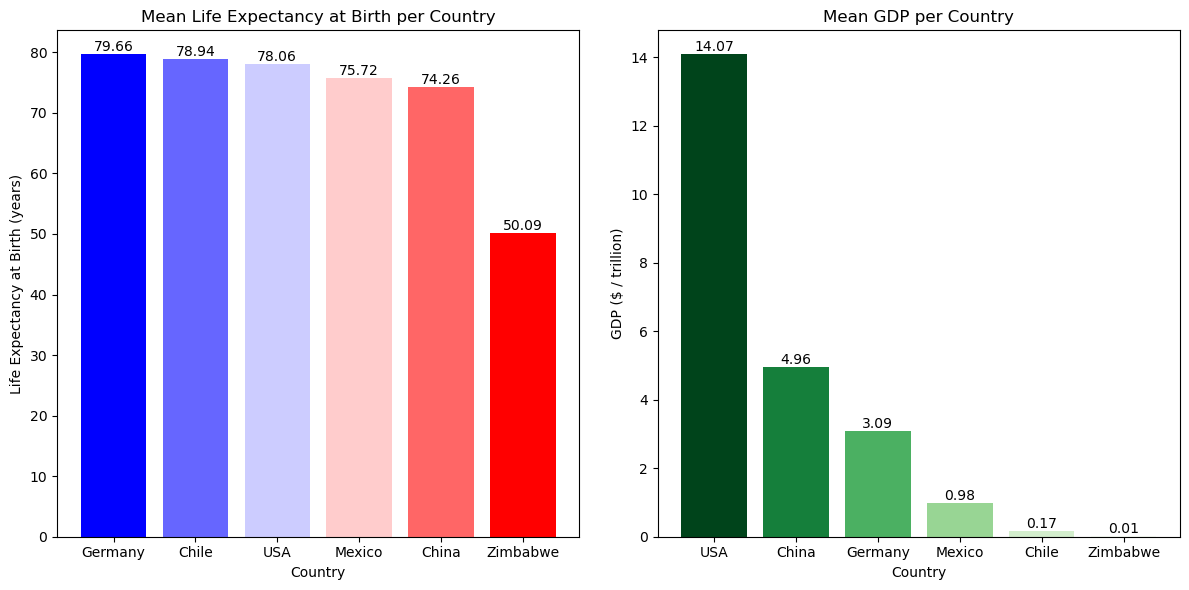

In [148]:
# grouping and calculating mean values
leaby_gdp_means = df.groupby("country").mean(["gdp", "leaby"])
leaby_gdp_means = pd.DataFrame(leaby_gdp_means).drop("year", axis=1)

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# subplot 1: Mean Life Expectancy at Birth per Country
leaby_gdp_means_sorted = leaby_gdp_means.sort_values(by=["leaby"], ascending=[False])
colormap_leaby = plt.colormaps["bwr"]
colors_leaby = colormap_leaby(np.linspace(0, 1, len(leaby_gdp_means_sorted)))

ax[0].bar(leaby_gdp_means_sorted.index, leaby_gdp_means_sorted.leaby, color=colors_leaby)
ax[0].set_title("Mean Life Expectancy at Birth per Country")
ax[0].set_xlabel('Country')
ax[0].set_ylabel('Life Expectancy at Birth (years)')

for index, leaby in enumerate(leaby_gdp_means_sorted.leaby):
    ax[0].text(index, leaby, f"{leaby:.2f}", ha="center", va="bottom")

# subplot 2: Mean GDP per Country
leaby_gdp_means_sorted = leaby_gdp_means.sort_values(by=["gdp"], ascending=[False])
colormap_gdp = plt.colormaps["Greens_r"]
colors_gdp = colormap_gdp(np.linspace(0, 1, len(leaby_gdp_means_sorted)))

ax[1].bar(leaby_gdp_means_sorted.index, leaby_gdp_means_sorted.gdp, color=colors_gdp)
ax[1].set_title("Mean GDP per Country")
ax[1].set_xlabel('Country')
ax[1].set_ylabel('GDP ($ / trillion)')

for index, gdp in enumerate(leaby_gdp_means_sorted.gdp):
    ax[1].text(index, gdp, f"{gdp:.2f}", ha="center", va="bottom")

plt.tight_layout()
plt.subplots_adjust(wspace=0.15)
plt.show()


<br>

- **Germany**:<br> 

> Relatively **high Life Expectancy at Birth** and a **moderate GDP**.<br>

> Germany is known for its well-developed healthcare system, social security programs, and a focus on public health initiatives. These factors contribute to the country's higher Life Expectancy despite having a GDP lower than the USA.<br>

- **Chile**:<br>  

> Relatively **high Life Expectancy at Birth** and a **relatively low GDP**.<br> 

> One possible explanation for this could be Chile's investment in healthcare and social welfare programs, which prioritize access to quality healthcare and contribute to improved Life Expectancy despite a lower GDP.<br>

- **USA**:<br>  

> Relatively **high Life Expectancy at Birth** and a **significantly higher GDP**.<br>

> The higher Life Expectancy in the USA could be attributed to factors such as advanced medical technology, a higher standard of living, and substantial investments in healthcare. However, it's worth noting that the USA also faces challenges with healthcare accessibility and disparities.

- **Mexico**:<br>  

> **Lower Life Expectancy at Birth** and a **relatively low GDP**.<br>

> The lower Life Expectancy in Mexico could be influenced by factors such as higher crime rates, socioeconomic inequalities, and challenges in healthcare accessibility and quality.

- **China**:<br>  

> **Lower Life Expectancy at Birth** compared to some other countries on the list, but it has a **significantly higher GDP**.<br>

> China's lower Life Expectancy could be attributed to various factors such as a large population, environmental challenges, and disparities in healthcare access across different regions.

- **Zimbabwe**:<br>  

> **Lowest Life Expectancy at Birth** and a **very low GDP**.<br>

> The lower Life Expectancy in Zimbabwe can be attributed to various factors, including political instability, economic challenges, limited healthcare resources, and high prevalence of diseases.

<br> 



### **What is the distribution of GDP and Life Expectancy?**

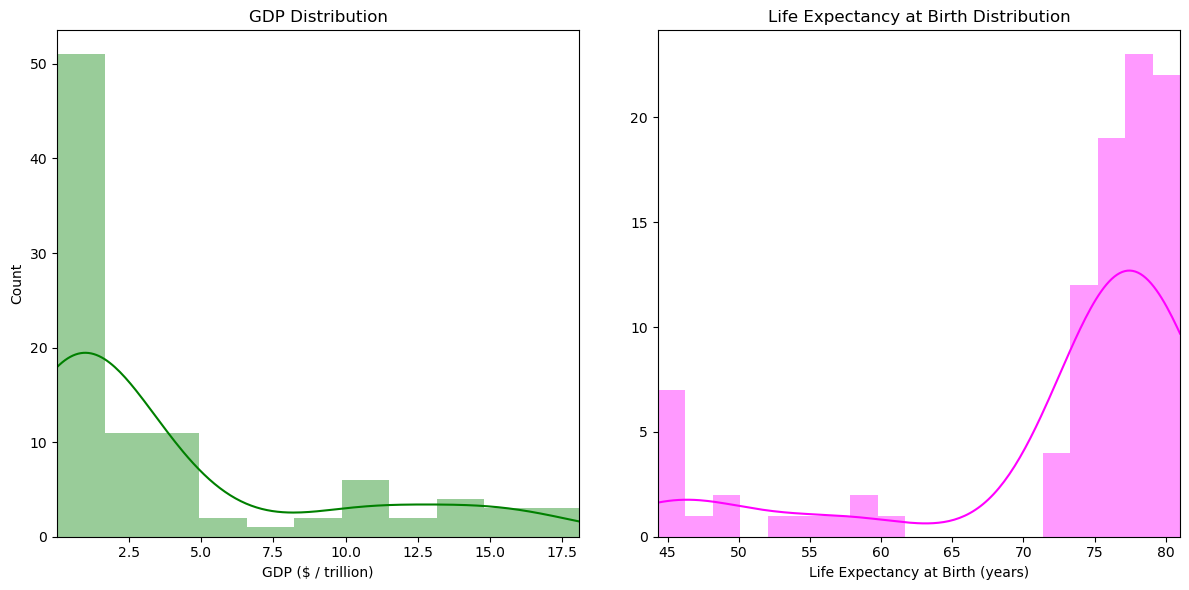

In [149]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# plot the GDP distribution on the first subplot
sns.histplot(df.gdp, kde=True, alpha=0.4, color="green", edgecolor=None, ax=ax[0])
sns.despine(left=False, right=False, top=False, bottom=False, ax=ax[0])
ax[0].set_title("GDP Distribution")
ax[0].set_xlabel("GDP ($ / trillion)")
ax[0].set_xlim(df.gdp.min(), df.gdp.max())

# plot the Life Expectancy at Birth distribution on the second subplot
sns.histplot(df.leaby, kde=True, alpha=0.4, color="magenta", edgecolor=None, ax=ax[1])
sns.despine(left=False, right=False, top=False, bottom=False, ax=ax[1])
ax[1].set_title("Life Expectancy at Birth Distribution")
ax[1].set_xlabel("Life Expectancy at Birth (years)")
ax[1].set_xlim(df.leaby.min(), df.leaby.max())
ax[1].set_ylabel("")

plt.tight_layout()
plt.subplots_adjust(wspace=0.15)
plt.show()


<br>

When observing the **distributions of GDP and Life Expectancy**, several observations can be made:

- **GDP Distribution**<br>
The distribution of GDP is **right-skewed**. This means that the **majority of countries tend to have lower GDP values**, while a few countries have significantly higher GDP values, leading to a longer right tail in the distribution.<br> 
This is indicative of income disparities, where a small number of countries or individuals possess a significant portion of the total wealth.

- **Life Expectancy Distribution**<br> 
The distribution of Life Expectancy is **left-skewed**. This implies that the majority of countries have relatively higher life expectancy values, while a few countries have lower life expectancy values, resulting in a longer left tail in the distribution.<br>
This could suggest that most countries enjoy relatively good health conditions and longer life spans, while a few countries may face challenges in terms of healthcare, nutrition, or other factors affecting life expectancy.

- **Power Law Distributions**<br> 
Both GDP and Life Expectancy distributions are **similar to power law distributions**.<br> 
Power law distributions are characterized by a few extreme values and a large number of smaller values, following a specific mathematical pattern.<br>
In the context of GDP and Life Expectancy, this indicates that a **small number of countries possess a disproportionately high GDP or experience significantly lower life expectancy compared to the majority of countries**.<br> 
This finding aligns with the presence of income and health disparities on a global scale.

Overall, these observations highlight the **unequal distribution of wealth and health outcomes across countries**, with a few nations exhibiting exceptional economic prosperity or health conditions, while others face challenges and disparities.

<br>


### **Is there a correlation between Life Expectancy at Birth and GDP of a country?**

The **dependent variable** is the **Life Expectancy at Birth**, and the **independent variable** is **GDP**.

> - **Null Hypothesis**: There is **no significant linear relationship** between Average Life Expectancy at Birth and GDP.

> - **Alternative Hypothesis**: There is **a significant linear relationship** between Average Life Expectancy at Birth and GDP.

,Country,Correlation Coefficient,p-value
1,Chile,0.95,0.000000018659140
2,China,0.91,0.000001125098572
3,Germany,0.93,0.000000140188155
4,Mexico,0.93,0.000000146869602
5,USA,0.98,0.000000000017500
6,Zimbabwe,0.97,0.000000001235852


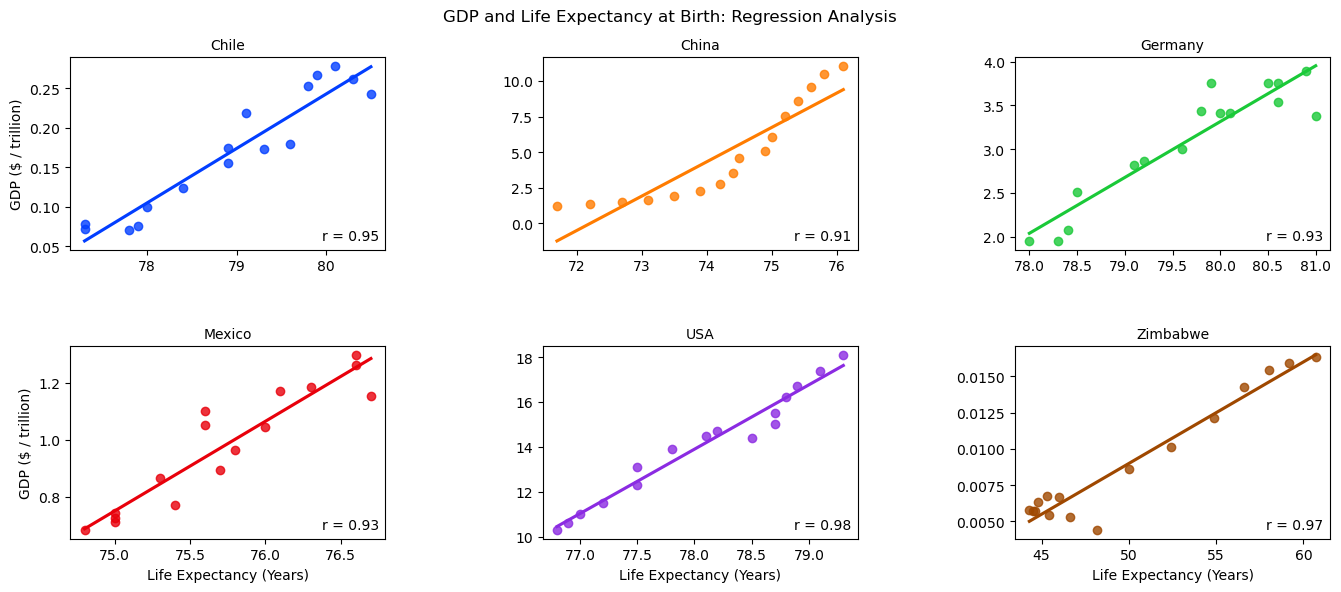

In [150]:
correlation_data = {"Country": df.country.unique(), "Correlation Coefficient": [], "p-value": []}

def calculate_correlation(x_values, y_values, **kwargs):
    correlation_coefficient, p_value = pearsonr(x_values, y_values)
    ax = plt.gca()
    ax.annotate(f"r = {correlation_coefficient:.2f}", xy=(0.98, 0.05), xycoords=ax.transAxes, ha='right', fontsize=10)
    correlation_data["Correlation Coefficient"].append(round(correlation_coefficient, 2))
    correlation_data["p-value"].append("{:.15f}".format(p_value))

gdp_leaby = sns.FacetGrid(df, col="country", col_wrap=3, hue="country", sharey=False, sharex=False, despine=False, aspect=1.5)
gdp_leaby.map(calculate_correlation, "leaby", "gdp")  
gdp_leaby = (gdp_leaby.map_dataframe(sns.regplot, "leaby", "gdp", marker="o", ci=None).set_axis_labels("Life Expectancy (Years)", "GDP ($ / trillion)"))

gdp_leaby.set_titles(col_template="{col_name}")
gdp_leaby.fig.suptitle("GDP and Life Expectancy at Birth: Regression Analysis")
plt.subplots_adjust(top=0.9, hspace=0.5, wspace=0.5)

correlation_data_df = pd.DataFrame(correlation_data)
correlation_data_df.index += 1
display(correlation_data_df)

plt.show()


<br>

These results indicate that there is a **strong positive linear relationship between the GDP and Life Expectancy** in all six countries being studied.<br>
The **correlation coefficients (r values) ranging from 0.91 to 0.98 further confirm the strength of this relationship**.<br>
Additionally, the **low p-values indicate that these correlations are statistically significant, meaning that the observed relationships are unlikely to be due to chance alone**.

<br>

These findings indicate that as the economic conditions improve, as measured by GDP, there is a corresponding increase in Life Expectancy. Higher GDP often implies better access to healthcare, improved living standards, increased education, and other factors that positively influence Life Expectancy.

**It is important to note that correlation does not necessarily imply causation**.<br>
While these **results suggest a strong association between GDP and Life Expectancy, other factors could also be at play**.<br> 
Further analysis and consideration of additional variables are required to establish causal relationships or identify other contributing factors.

<br>

# **Conclusion**


<br>

In conclusion, **the analysis of the dataset reveals a strong correlation between GDP and Life Expectancy at Birth**, indicating a relationship between a nation's economic wealth and the well-being of its citizens.<br>
However, it is important to acknowledge that GDP and Life Expectancy are influenced by numerous factors. **To gain a more comprehensive understanding of the intricate relationship between GDP and Life Expectancy, it is crucial to consider additional data and indicators that reflect a nation's development and standard of living**.<br>

Indicators such as the **Gini coefficient**, **income distribution**, **poverty rates**, **wealth distribution**, **Human Development Index (HDI)**, **labor market indicators**, **social indicators**, and **inequality indices** provide valuable insights into wealth distribution and socio-economic inequality within a country.<br>
These indicators shed light on factors such as income inequality, concentration of wealth, access to healthcare, education, housing, and other social services, as well as employment dynamics and job security.

**By expanding the dataset** and incorporating these indicators into the analysis, future studies can enhance the robustness of the findings and provide a more holistic understanding of the complex relationship between GDP and Life Expectancy.<br>
**This comprehensive approach will enable policymakers and researchers to address the multi-faceted nature of wealth distribution and work towards creating more equitable societies that promote both economic prosperity and improved quality of life for all citizens.**